y  (12, 1)
X  (12, 1)
y_pred  (10, 1)
sigma  (10,)
[[  8221158.00000169]
 [ 85177407.84866771]
 [ 61800907.62764964]
 [ -3611200.64458334]
 [ 77360529.74443576]
 [-10408491.62383628]
 [  8177692.99999943]
 [  8095993.03125944]
 [  2135101.84697408]
 [ 81686610.99999182]]
[ 0.00000999  9.11741332  9.46352339 29.72325158 13.89340576  9.19464569
  0.00000999 13.94535532 13.95034538  0.00001   ]


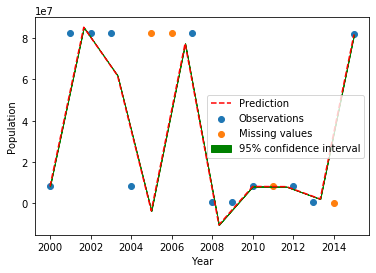

In [9]:
import numpy as np
import random 
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

np.random.seed(1)
%matplotlib inline

#def f(x):
#    """The function to predict."""
#    return x * np.sin(x)

# ----------------------------------------------------------------------
#  First the noiseless case
#y = np.array([[8221158,
#               82349925,
#               82488495,
#               82534176,
#               82469422,
#               82376451,
#               82266372,
#               819237,
#               8177693,
#               8425823,
#               89825,
#               81686611
#               ]]).reshape(-1,1)
#X = np.array([[2000,2001,2002,2003,2005,2006,2007,2009,2010,2012,2014,2015]]).reshape(-1,1)

#Y = np.array([[8251626,
#               821197,
#               8274983,
#               864565]]).reshape(-1,1)       
#reading data from csv 
df = pd.read_csv('datasets_12603_17232_Life Expectancy Data.csv')

#extract dataframes corresponding to countries
def countryDF(country):
    countryData = df[df['Country'] == country]
    return countryData


#extract columns
def columnExtractor(dataframe, columnName):
    values = dataframe[columnName]
    return values 

def plotPopulation(qty1, qty2, label):
    plt.yscale('log')
    plt.ylabel('Population')
    plt.xlabel('Years')
    plt.scatter(qty1, qty2, label=label)
    plt.title('Population vs Year')
    plt.legend()
    
    
# Population growth of 3 countries (Germany, Netherlands, Spain)
germanyDF = countryDF('Germany')
germanyPopulation = columnExtractor(germanyDF,'Population')

years = columnExtractor(germanyDF,'Year')
#plotPopulation(years, germanyPopulation,label='Germany')


y = germanyPopulation.tolist()
X = years.tolist()

c = list(zip(X,y))
random.shuffle(c) 

X,y = zip(*c) 


y = list(y)
y1 = y[:12]


X = list(X)
X1 = X[:12]


Y = y[12:]


x_mis = X[12:]


y = y1 
X = X1


y = np.asarray(y).reshape(-1,1)
X = np.asarray(X).reshape(-1,1)
print('y ',y.shape)
print('X ',X.shape)

Y = np.asarray(Y).reshape(-1,1)
x_mis = np.asarray(x_mis).reshape(-1,1)


 
#X = np.sort(X)
#Y = np.asarray(Y).reshape(-1,1)



# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
#x = np.atleast_2d(np.linspace(0, 10, 1000)).T
x = np.array(np.linspace(2000, 2015, 10)).reshape(-1,1)

# Instantiate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)
print('y_pred ',y_pred.shape)
print('sigma ',sigma.shape)
# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure()

#plt.plot(x, Y, 'r--',label=r'$f(x) = x\,\sin(x)$')
#actual data 
plt.scatter(X, y,label='Observations')
#, 'b--',markersize=10, 
#estimate
plt.plot(x, y_pred, 'r--', label='Prediction')
plt.scatter(x_mis,Y,label='Missing values')

#print(y_pred - 1.9600 * sigma)
#plt.fill(np.concatenate([x, x[::-1]]),
#         np.concatenate([y_pred - 1.9600 * sigma,
#                        (y_pred + 1.9600 * sigma)[::-1]])[:,6],
#         alpha=1, fc='b', ec='None', label='95% confidence interval')
#ax1.fill_between(X2.flat, μ2-2*σ2, μ2+2*σ2, color='red', 
#                 alpha=0.15, label='$2 \sigma_{2|1}$')

#print(x.shape)
#print(y.shape)
#print(y_pred.shape)
#print(sigma.shape)
#print((y_pred.flat-2*sigma).shape)
#print((y_pred.flat+2*sigma).shape)
np.set_printoptions(suppress=True)
print(y_pred)
print(sigma)
plt.fill_between(x.flat, (y_pred.flat-2*sigma), (y_pred.flat+2*sigma), 
                 color='green',alpha=1,label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylabel('Population')
plt.xlabel('Year')

#plt.ylim((-1e5,1e5))
#plt.ylim(1e3, 1e8)
plt.legend()